# Seyed Mohammad Amin Atyabi - 830402014 - HW 5 (Part 2)

در این بخش قرار است تا شبکه ای مقیاس آزاد به صورت تصادفی تولید کرده و در این شبکه با استفاده از معیار مرکزیت، گره های تاثیر گذار را شناسایی کنیم. اندازه گیری معیار مرکزیت را در حین تکامل شبکه انجام میدهیم تا نحوه تکامل مشخص باشد.

در این بخش از روی $preferential attachment$ برای ساخت شبکه استفاده کردیم. از 100 گره شروع و در هر مرحله 100 گره به شبکه اضافه میشوند. هر گره حداقل 2 یال در این شبکه دارد.

برای این تمرین معیار های مرکزیت مختلفی وجود دارند اما با بررسی های انجام شده (برای مثال [این مقاله](https://doi.org/10.1016/j.jksuci.2023.101798)) معیار مرکزیت بینیت را برای اندازه گیری انتخاب میکنیم چرا که معیاری است که نسبتا تمام شبکه را در بر میگیرد و مانند معیار هایی مثل مرکزیت درجه، به صورت محلی عملی نمیکند.

برای محاسبه معیار مرکزیت بینیت روی شبکه الگوریتم $BFS$ را اجرا میکنیم تا کوتاهترین مسیر را بدست بیاوریم. سپس تعداد این کوتاهترین مسیر ها را ذخیره میکنیم و به هر گره اختصاص میدهیم.

In [1]:
import random
import networkx
from collections import deque
from matplotlib import pyplot as plt


def create_network(n, m, initial_network=None):
    if initial_network is None:
        network = networkx.Graph()
        network.add_node(0)
    else:
        network = initial_network.copy()

    prev_network_size = len(network.nodes)
    for i in range(prev_network_size, prev_network_size + n):
        nodes = list(network.nodes)
        probabilities = [len(nodes) for _ in nodes]
        total = sum(probabilities)
        probabilities = [p / total for p in probabilities]

        chosen_nodes = random.choices(nodes, probabilities, k=m)

        for node in chosen_nodes:
            network.add_edge(i, node)

    return network.copy()


def calculate_betweenness_centrality(network):
    betweenness_centrality = {node: 0.0 for node in network.nodes}

    for node in network.nodes:
        stack = []
        paths = {w: [] for w in network.nodes}
        paths[node] = [node]
        num_paths = {w: 0 for w in network.nodes}
        num_paths[node] = 1
        dist = {w: -1 for w in network.nodes}
        dist[node] = 0
        queue = deque([node])

        while queue:
            v = queue.popleft()
            stack.append(v)
            for w in network.neighbors(v):
                if dist[w] < 0:
                    queue.append(w)
                    dist[w] = dist[v] + 1
                if dist[w] == dist[v] + 1:
                    num_paths[w] += num_paths[v]
                    paths[w].append(v)

        delta = {w: 0 for w in network.nodes}
        while stack:
            w = stack.pop()
            for v in paths[w]:
                delta[v] += (num_paths[v] / num_paths[w]) * (1 + delta[w])
            if w != node:
                betweenness_centrality[w] += delta[w]

    return betweenness_centrality


def detect_influencers(centrality_snapshots, threshold):
    influencers = []
    for t in range(len(centrality_snapshots) - 1):
        centrality_t = centrality_snapshots[t]
        centrality_t_plus_1 = centrality_snapshots[t + 1]
        for node, centrality in centrality_t.items():
            change_in_centrality = abs(centrality_t_plus_1[node] - centrality)
            if change_in_centrality > threshold:
                influencers.append(node)
    return influencers


def draw_network(network, centrality, figsize=(10, 10)):
    high_centrality_threshold = (max(centrality.values()) * 0.6)
    node_colors = ['r' if c > high_centrality_threshold else 'c' for c in centrality.values()]
    plt.figure(figsize=figsize)
    pos = networkx.spring_layout(network)
    networkx.draw(network, pos, node_color=node_colors, with_labels=True)
    plt.show()

در شکل زیر شبکه ای که کار با آن آغاز میشود را مشاهده میکنید که دارای 100 گره است.

در این شبکه گره های تاثیر گذار با رنگ قرمز مشخص شده اند.

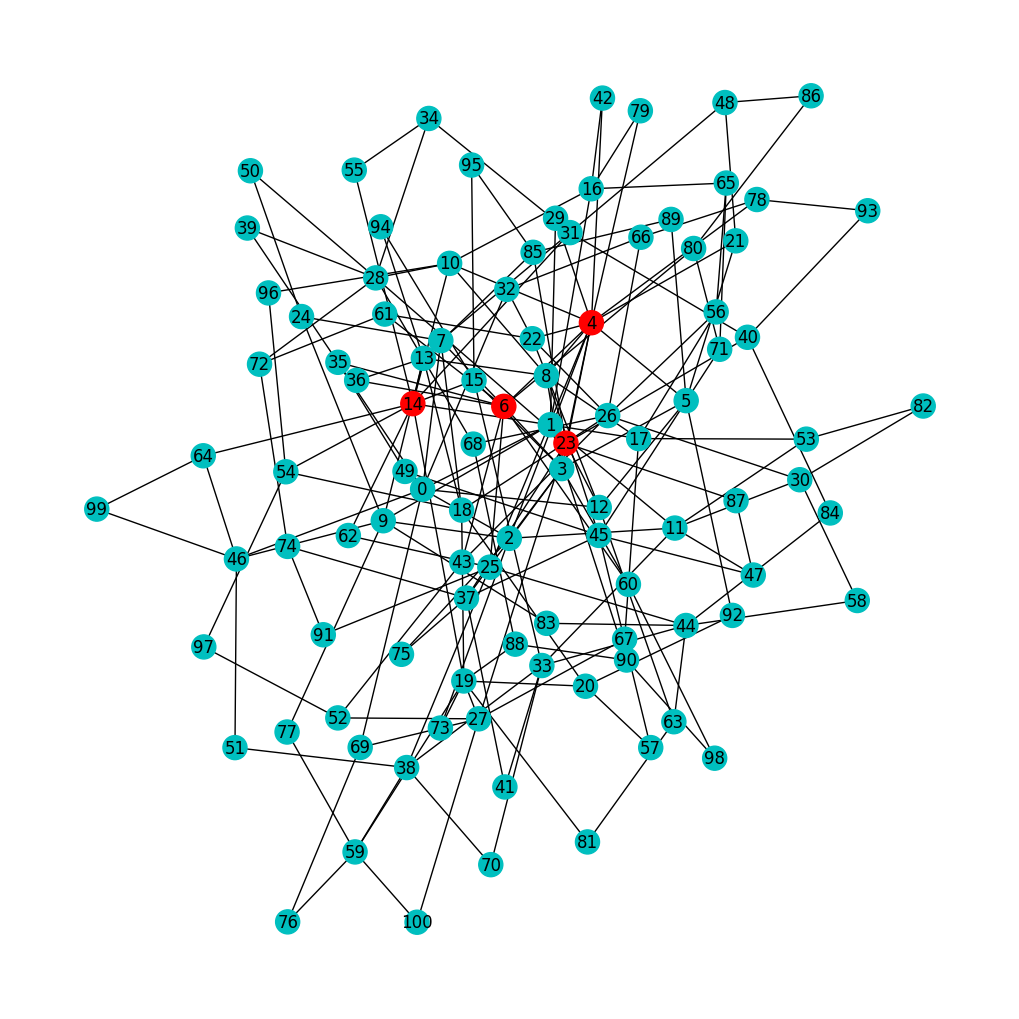

In [2]:
networks = [create_network(100, 2)]
centrality = [calculate_betweenness_centrality(networks[-1])]

draw_network(networks[-1], centrality[-1], (10, 10))

در ادامه نحوه تکامل شبکه ملاحظه میشود.

در هر مرحله 100 گره به شبکه اضافه میشوند و گره های تاثیر گذار با رنگ قرمز مشخص شده اند.

In [ ]:
SNAPSHOTS_COUNT = 20
figsize = (10, 10)

for _ in range(SNAPSHOTS_COUNT):
    networks.append(create_network(100, 2, networks[-1]))
    centrality.append(calculate_betweenness_centrality(networks[-1]))
    figsize = (figsize[0] + 2, figsize[1] + 2)
    draw_network(networks[-1], centrality[-1], figsize)

در نهایت گره های تاثیر گذار به صورت زیر مشخص شده اند.

In [ ]:
print(f'Influencer nodes: {list(set(detect_influencers(centrality, 8000)))}')